<a href="https://colab.research.google.com/github/JANANI-B-S/email-classification/blob/main/Email_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install pandas numpy streamlit seaborn matplotlib scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import streamlit as st



In [36]:
# Load the dataset (with encoding fix)
df = pd.read_csv('/content/sample_data/spam.csv', encoding='ISO-8859-1')

# Convert labels to binary values (1 for spam, 0 for ham)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split the data into features (X) and labels (y)
X = df['text']
y = df['label']

# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')  # Remove common words (stop words)
X_vec = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=42)


Naive Bayes Model - Accuracy: 97.73%


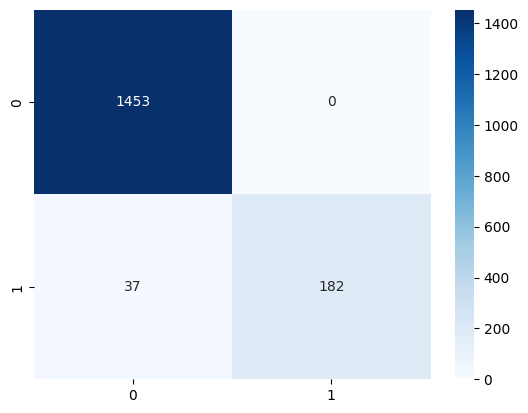

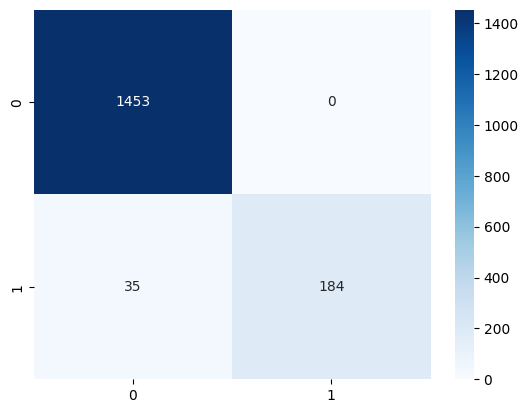

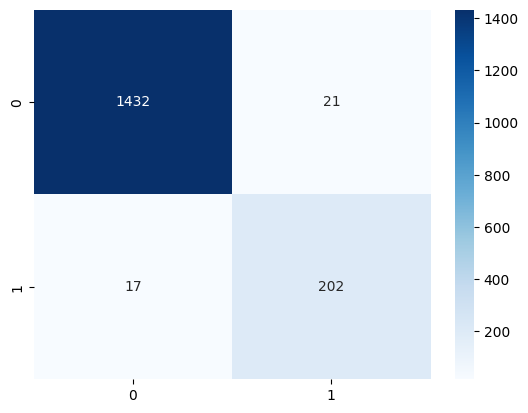

Precision: 0.95


In [37]:
# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Accuracy and Confusion Matrix
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Display Results
print(f'Naive Bayes Model - Accuracy: {accuracy_nb * 100:.2f}%')

# Confusion Matrix Plot
fig, ax = plt.subplots()
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", ax=ax)
plt.show()

# Precision
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
precision_nb = report_nb['macro avg']['precision']
print(f"Precision: {precision_nb:.2f}")


Support Vector Machine Model - Accuracy: 97.79%


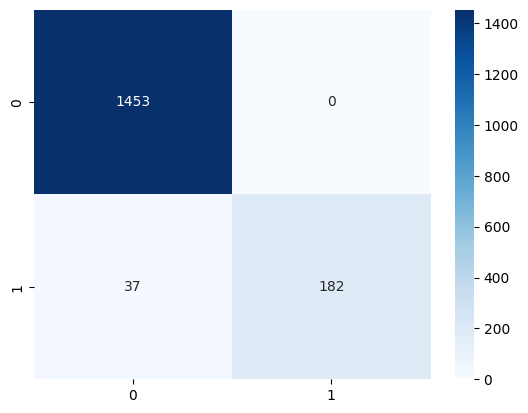

Precision: 0.99


In [38]:
# Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Accuracy and Confusion Matrix
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display Results
print(f'Support Vector Machine Model - Accuracy: {accuracy_svm * 100:.2f}%')

# Confusion Matrix Plot
fig, ax = plt.subplots()
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", ax=ax)
plt.show()

# Precision
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
precision_svm = report_svm['macro avg']['precision']
print(f"Precision: {precision_svm:.2f}")


Logistic Regression Model - Accuracy: 97.91%


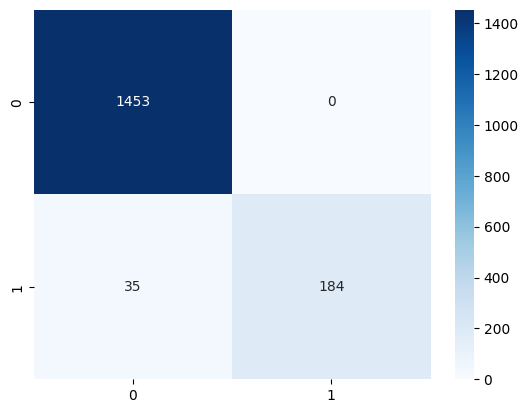

Precision: 0.99


In [39]:
# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Accuracy and Confusion Matrix
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Display Results
print(f'Logistic Regression Model - Accuracy: {accuracy_lr * 100:.2f}%')

# Confusion Matrix Plot
fig, ax = plt.subplots()
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", ax=ax)
plt.show()

# Precision
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
precision_lr = report_lr['macro avg']['precision']
print(f"Precision: {precision_lr:.2f}")


In [42]:
# Save the Streamlit app code to app.py
with open('app.py', 'w') as file:
    file.write("""
import streamlit as st
import pickle
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK stopwords
nltk.download('stopwords')

# Load model and vectorizer
with open('nb_model.pkl', 'rb') as model_file:
    nb_model = pickle.load(model_file)

with open('svm_model.pkl', 'rb') as model_file:
    svm_model = pickle.load(model_file)

with open('vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Function to preprocess the email content
def preprocess_text(text):
    # Remove special characters, digits, and punctuation
    text = re.sub(r'\W', ' ', str(text))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

# Streamlit App
st.title("Spam Email Detector")
st.write("Enter an email below to check if it's spam or not:")

email = st.text_area("Email Text")

if st.button("Predict"):
    if not email.strip():
        st.error("Please enter some email text to predict.")
    else:
        # Preprocess the email input
        processed_email = preprocess_text(email)

        # Transform the email input
        email_vec = vectorizer.transform([processed_email])

        # Predict using both models
        nb_prediction = nb_model.predict(email_vec)[0]
        svm_prediction = svm_model.predict(email_vec)[0]

        # Display results
        if nb_prediction == 'spam':
            st.success("Naive Bayes Prediction: Spam")
        else:
            st.success("Naive Bayes Prediction: Not Spam")

        if svm_prediction == 'spam':
            st.success("SVM Prediction: Spam")
        else:
            st.success("SVM Prediction: Not Spam")
    """)



In [43]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you already have a preprocessed dataset in X and y

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Save models and vectorizer
with open('nb_model.pkl', 'wb') as nb_file:
    pickle.dump(nb_model, nb_file)

with open('svm_model.pkl', 'wb') as svm_file:
    pickle.dump(svm_model, svm_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [ ]:
!streamlit run app.py &>/content/logs.txt &
!npx cloudflared tunnel --url http://localhost:8501


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋Need to install the following packages:
cloudflared@0.5.3
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙2024-12-09T14:21:47Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2024-12-09T14:21:47Z INF Requesting new quick Tunnel on trycloudflare.com...
2024-12-09T14:21:51Z INF +--------------------------------------------------------------------------------------------+
2024-12-09T14:21:51Z INF |  Your quick Tunnel has been created! Visit it at (it may take s